# Numerical Analysis of Second Order Trotter Error
Aims:
- verify that single-step Trotter error of my simulation follows expected scaling law
- evaluate prefactors of the fit function to investigate for further (unaccounted for) dependences 

References:
  1. https://journals.aps.org/prx/pdf/10.1103/PhysRevX.11.011020 _Theory of Trotter Error with Commutator Scaling_

# Requirements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares  
from functools import partial
import time
from core_functions_Trotter import *

In [2]:
# ugly!!!

XY3,  XZ3 , YZ3  = gen_Heisenberg_terms(3)
XY4,  XZ4 , YZ4  = gen_Heisenberg_terms(4)
XY5,  XZ5 , YZ5  = gen_Heisenberg_terms(5)
XY6,  XZ6 , YZ6  = gen_Heisenberg_terms(6)
XY7,  XZ7 , YZ7  = gen_Heisenberg_terms(7)
XY8,  XZ8 , YZ8  = gen_Heisenberg_terms(8)
XY9,  XZ9 , YZ9  = gen_Heisenberg_terms(9)
XY10, XZ10, YZ10 = gen_Heisenberg_terms(10)
XY11, XZ11, YZ11 = gen_Heisenberg_terms(11)
XY12, XZ12, YZ12 = gen_Heisenberg_terms(12)
XY13, XZ13, YZ13 = gen_Heisenberg_terms(13)
XY14, XZ14, YZ14 = gen_Heisenberg_terms(14)
XY15, XZ15, YZ15 = gen_Heisenberg_terms(15)
XY16, XZ16, YZ16 = gen_Heisenberg_terms(16)
XY17, XZ17, YZ17 = gen_Heisenberg_terms(17)
XY18, XZ18, YZ18 = gen_Heisenberg_terms(18)
XY19, XZ19, YZ19 = gen_Heisenberg_terms(19)
XY20, XZ20, YZ20 = gen_Heisenberg_terms(20)

XY3XZ3 = comm_lincombo(XY3, XZ3)
XY3YZ3 = comm_lincombo(XY3, YZ3)
XZ3YZ3 = comm_lincombo(XZ3, YZ3)

XY4XZ4 = comm_lincombo(XY4, XZ4)
XY4YZ4 = comm_lincombo(XY4, YZ4)
XZ4YZ4 = comm_lincombo(XZ4, YZ4)

XY5XZ5 = comm_lincombo(XY5, XZ5)
XY5YZ5 = comm_lincombo(XY5, YZ5)
XZ5YZ5 = comm_lincombo(XZ5, YZ5)

XY6XZ6 = comm_lincombo(XY6, XZ6)
XY6YZ6 = comm_lincombo(XY6, YZ6)
XZ6YZ6 = comm_lincombo(XZ6, YZ6)

XY7XZ7 = comm_lincombo(XY7, XZ7)
XY7YZ7 = comm_lincombo(XY7, YZ7)
XZ7YZ7 = comm_lincombo(XZ7, YZ7)

XY8XZ8 = comm_lincombo(XY8, XZ8)
XY8YZ8 = comm_lincombo(XY8, YZ8)
XZ8YZ8 = comm_lincombo(XZ8, YZ8)

XY9XZ9 = comm_lincombo(XY9, XZ9)
XY9YZ9 = comm_lincombo(XY9, YZ9)
XZ9YZ9 = comm_lincombo(XZ9, YZ9)

XY10XZ10 = comm_lincombo(XY10, XZ10)
XY10YZ10 = comm_lincombo(XY10, YZ10)
XZ10YZ10 = comm_lincombo(XZ10, YZ10)

XY11XZ11 = comm_lincombo(XY11, XZ11)
XY11YZ11 = comm_lincombo(XY11, YZ11)
XZ11YZ11 = comm_lincombo(XZ11, YZ11)

XY12XZ12 = comm_lincombo(XY12, XZ12)
XY12YZ12 = comm_lincombo(XY12, YZ12)
XZ12YZ12 = comm_lincombo(XZ12, YZ12)

XY13XZ13 = comm_lincombo(XY13, XZ13)
XY13YZ13 = comm_lincombo(XY13, YZ13)
XZ13YZ13 = comm_lincombo(XZ13, YZ13)

XY14XZ14 = comm_lincombo(XY14, XZ14)
XY14YZ14 = comm_lincombo(XY14, YZ14)
XZ14YZ14 = comm_lincombo(XZ14, YZ14)

XY15XZ15 = comm_lincombo(XY15, XZ15)
XY15YZ15 = comm_lincombo(XY15, YZ15)
XZ15YZ15 = comm_lincombo(XZ15, YZ15)

XY16XZ16 = comm_lincombo(XY16, XZ16)
XY16YZ16 = comm_lincombo(XY16, YZ16)
XZ16YZ16 = comm_lincombo(XZ16, YZ16)

XY17XZ17 = comm_lincombo(XY17, XZ17)
XY17YZ17 = comm_lincombo(XY17, YZ17)
XZ17YZ17 = comm_lincombo(XZ17, YZ17)

XY18XZ18 = comm_lincombo(XY18, XZ18)
XY18YZ18 = comm_lincombo(XY18, YZ18)
XZ18YZ18 = comm_lincombo(XZ18, YZ18)

XY19XZ19 = comm_lincombo(XY19, XZ19)
XY19YZ19 = comm_lincombo(XY19, YZ19)
XZ19YZ19 = comm_lincombo(XZ19, YZ19)

XY20XZ20 = comm_lincombo(XY20, XZ20)
XY20YZ20 = comm_lincombo(XY20, YZ20)
XZ20YZ20 = comm_lincombo(XZ20, YZ20)

terms_XY3XZ3 = group_by_pauli_string(XY3XZ3, N=3)
terms_XY3YZ3 = group_by_pauli_string(XY3YZ3, N=3)
terms_XZ3YZ3 = group_by_pauli_string(XZ3YZ3, N=3)

terms_XY4XZ4 = group_by_pauli_string(XY4XZ4, N=4)
terms_XY4YZ4 = group_by_pauli_string(XY4YZ4, N=4)
terms_XZ4YZ4 = group_by_pauli_string(XZ4YZ4, N=4)

terms_XY5XZ5 = group_by_pauli_string(XY5XZ5, N=5)
terms_XY5YZ5 = group_by_pauli_string(XY5YZ5, N=5)
terms_XZ5YZ5 = group_by_pauli_string(XZ5YZ5, N=5)

terms_XY6XZ6 = group_by_pauli_string(XY6XZ6, N=6)
terms_XY6YZ6 = group_by_pauli_string(XY6YZ6, N=6)
terms_XZ6YZ6 = group_by_pauli_string(XZ6YZ6, N=6)

terms_XY7XZ7 = group_by_pauli_string(XY7XZ7, N=7)
terms_XY7YZ7 = group_by_pauli_string(XY7YZ7, N=7)
terms_XZ7YZ7 = group_by_pauli_string(XZ7YZ7, N=7)

terms_XY8XZ8 = group_by_pauli_string(XY8XZ8, N=8)
terms_XY8YZ8 = group_by_pauli_string(XY8YZ8, N=8)
terms_XZ8YZ8 = group_by_pauli_string(XZ8YZ8, N=8)

terms_XY9XZ9 = group_by_pauli_string(XY9XZ9, N=9)
terms_XY9YZ9 = group_by_pauli_string(XY9YZ9, N=9)
terms_XZ9YZ9 = group_by_pauli_string(XZ9YZ9, N=9)

terms_XY10XZ10 = group_by_pauli_string(XY10XZ10, N=10)
terms_XY10YZ10 = group_by_pauli_string(XY10YZ10, N=10)
terms_XZ10YZ10 = group_by_pauli_string(XZ10YZ10, N=10)

terms_XY11XZ11 = group_by_pauli_string(XY11XZ11, N=11)
terms_XY11YZ11 = group_by_pauli_string(XY11YZ11, N=11)
terms_XZ11YZ11 = group_by_pauli_string(XZ11YZ11, N=11)

terms_XY12XZ12 = group_by_pauli_string(XY12XZ12, N=12)
terms_XY12YZ12 = group_by_pauli_string(XY12YZ12, N=12)
terms_XZ12YZ12 = group_by_pauli_string(XZ12YZ12, N=12)

terms_XY13XZ13 = group_by_pauli_string(XY13XZ13, N=13)
terms_XY13YZ13 = group_by_pauli_string(XY13YZ13, N=13)
terms_XZ13YZ13 = group_by_pauli_string(XZ13YZ13, N=13)

terms_XY14XZ14 = group_by_pauli_string(XY14XZ14, N=14)
terms_XY14YZ14 = group_by_pauli_string(XY14YZ14, N=14)
terms_XZ14YZ14 = group_by_pauli_string(XZ14YZ14, N=14)

terms_XY15XZ15 = group_by_pauli_string(XY15XZ15, N=15)
terms_XY15YZ15 = group_by_pauli_string(XY15YZ15, N=15)
terms_XZ15YZ15 = group_by_pauli_string(XZ15YZ15, N=15)

terms_XY16XZ16 = group_by_pauli_string(XY16XZ16, N=16)
terms_XY16YZ16 = group_by_pauli_string(XY16YZ16, N=16)
terms_XZ16YZ16 = group_by_pauli_string(XZ16YZ16, N=16)

terms_XY17XZ17 = group_by_pauli_string(XY17XZ17, N=17)
terms_XY17YZ17 = group_by_pauli_string(XY17YZ17, N=17)
terms_XZ17YZ17 = group_by_pauli_string(XZ17YZ17, N=17)

terms_XY18XZ18 = group_by_pauli_string(XY18XZ18, N=18)
terms_XY18YZ18 = group_by_pauli_string(XY18YZ18, N=18)
terms_XZ18YZ18 = group_by_pauli_string(XZ18YZ18, N=18)

terms_XY19XZ19 = group_by_pauli_string(XY19XZ19, N=19)
terms_XY19YZ19 = group_by_pauli_string(XY19YZ19, N=19)
terms_XZ19YZ19 = group_by_pauli_string(XZ19YZ19, N=19)

terms_XY20XZ20 = group_by_pauli_string(XY20XZ20, N=20)
terms_XY20YZ20 = group_by_pauli_string(XY20YZ20, N=20)
terms_XZ20YZ20 = group_by_pauli_string(XZ20YZ20, N=20)

## Theoretical requirements

### Theorem 1: Trotter error with commutator scaling  
Let $H = \sum_{\gamma=1}^{\Gamma} H_\gamma$ be an operator consisting of $\Gamma$ summands, and let $t \ge 0$. Let $S(t) = \prod_{\upsilon=1}^{\Upsilon} \prod_{\gamma=1}^{\Gamma}\exp\left( t\, a_{\upsilon,\gamma}\, H_{\pi_\upsilon(\gamma)} \right)$ be a $p$-th order product formula. Define 
$$
\tilde{\alpha}_{\text{comm}} = \sum_{\gamma_1,\gamma_2,\ldots,\gamma_{p+1}=1}^{\Gamma} \left\| \big[ H_{\gamma_{p+1}}, \ldots, [ H_{\gamma_2}, H_{\gamma_1} ] \ldots \big] \right\|.
\tag{1}
$$

Then the **additive Trotter error** and the **multiplicative Trotter error**, defined respectively by
$$
S(t) = e^{tH} + A(t),\quad S(t) = e^{tH}\,(I + M(t))
$$
For anti-Hermitian operators $H_\gamma$, these can be asymptotically bounded as
$$
\|A(t)\|,\; \|M(t)\|
= \mathcal{O}\!\left(
\tilde{\alpha}_{\mathrm{comm}} \, t^{p+1}
\right).
$$

### Theorem 2: Tight error bound for the second-order Lie-Trotter formula
Let $H = \sum_{\gamma=1}^{\Gamma} H_\gamma$ be a Hamiltonian consisting of $\Gamma$ summands, and let $dt \ge 0$. Let $S_2(dt)= \prod_{\gamma=\Gamma}^{1} e^{-i (dt/2) H_\gamma}  \prod_{\gamma=1}^{\Gamma} e^{-i (dt/2) H_\gamma}$ be the second-order Suzuki formula. Then, the additive Trotter error can be bounded as
$$
\begin{aligned}
\varepsilon_2(dt)\coloneqq\bigl\| S_2(dt) - e^{-idtH} \bigr\|
\le {} &
\frac{dt^3}{12}
\sum_{\gamma_1=1}^{\Gamma}
\left\|
\left[
\sum_{\gamma_3=\gamma_1+1}^{\Gamma}
H_{\gamma_3},
\left[ \sum_{\gamma_2=\gamma_1+1}^{\Gamma}
H_{\gamma_2}, H_{\gamma_1} \right]
\right]
\right\| \\
& {} +
\frac{dt^3}{24}
\sum_{\gamma_1=1}^{\Gamma}
\left\|
\left[
H_{\gamma_1},
\left[
H_{\gamma_1},
\sum_{\gamma_2=\gamma_1+1}^{\Gamma} H_{\gamma_2}
\right]
\right]
\right\|.
\end{aligned}
$$



# First Order Analysis
Fit the scaling laws of the various dependences of the first order additive error and tight error bound to fit functions that depend on the parameters of the system.
## Additive Trotter Error
Use Theorem 1 under the following set of hypothesis: 
- $H = H^N = H_{XY}^N + H_{XZ}^N + H_{YZ}^N \equiv H_1 + H_2 + H_3$ 
- $\Gamma = 3$ (implied by the Hamiltonian decomposition)
- $S(t) = S_2(t) = \prod_{\gamma=\Gamma}^{1} e^{-i(t/2) H_\gamma}\prod_{\gamma=1}^{\Gamma} e^{-i(t/2) H_\gamma}$ $\implies$ $p=2$ order product formula. 
$\implies \left\|\mathcal{A}(t, N, \left\{g_{ij}\right\}_{i<j})\right\| = \mathcal{O}(\tilde{\alpha}_\text{comm}(N,\left\{g_{ij}\right\}_{i<j})t^3)$

Define $\mathcal{G} \coloneqq \left\{g_{ij}\right\}_{i<j}$.

Under these assumptions, $\tilde{\alpha}_\text{comm}(N,\left\{g_{ij}\right\}_{i<j})$ takes the following expression:

$$
\begin{split}
\tilde{\alpha}_\text{comm} 
&= \sum_{\gamma_1,\gamma_2, \gamma_3=1}^3 \left\|\left[H_{\gamma_3},\left[H_{\gamma_2},H_{\gamma_1}\right]\right]\right\| = \\
&= \sum_{\gamma_1, \gamma_2 = 1}^3 \Bigl(
  \left\|\left[H_1,\left[H_{\gamma_2},H_{\gamma_1}\right]\right]\right\|+\left\|\left[H_2,\left[H_{\gamma_2},H_{\gamma_1}\right]\right]\right\|+\left\|\left[H_3,\left[H_{\gamma_2},H_{\gamma_1}\right]\right]\right\|\Bigr) \\
&= \sum_{\gamma_1 = 1}^3 \Bigl(
  \left\|\left[H_1,\left[H_1,H_{\gamma_1}\right]\right]\right\|+
  \left\|\left[H_1,\left[H_2,H_{\gamma_1}\right]\right]\right\|+
  \left\|\left[H_1,\left[H_3,H_{\gamma_1}\right]\right]\right\|+\\
&\quad+\left\|\left[H_2,\left[H_1,H_{\gamma_1}\right]\right]\right\|+
  \left\|\left[H_2,\left[H_2,H_{\gamma_1}\right]\right]\right\|+
  \left\|\left[H_2,\left[H_3,H_{\gamma_1}\right]\right]\right\|+\\
&\quad+\left\|\left[H_3,\left[H_1,H_{\gamma_1}\right]\right]\right\|+
  \left\|\left[H_3,\left[H_2,H_{\gamma_1}\right]\right]\right\|+
  \left\|\left[H_3,\left[H_3,H_{\gamma_1}\right]\right]\right\|+
\Bigr) \\
&=     \left\|\left[H_1,\left[H_1,H_1\right]\right]\right\|+
       \left\|\left[H_1,\left[H_1,H_2\right]\right]\right\|+
       \left\|\left[H_1,\left[H_1,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_1,\left[H_2,H_1\right]\right]\right\|+
       \left\|\left[H_1,\left[H_2,H_2\right]\right]\right\|+
       \left\|\left[H_1,\left[H_2,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_1,\left[H_3,H_1\right]\right]\right\|+
       \left\|\left[H_1,\left[H_3,H_2\right]\right]\right\|+
       \left\|\left[H_1,\left[H_3,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_2,\left[H_1,H_1\right]\right]\right\|+
       \left\|\left[H_2,\left[H_1,H_2\right]\right]\right\|+
       \left\|\left[H_2,\left[H_1,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_2,\left[H_2,H_1\right]\right]\right\|+
       \left\|\left[H_2,\left[H_2,H_2\right]\right]\right\|+
       \left\|\left[H_2,\left[H_2,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_2,\left[H_3,H_1\right]\right]\right\|+
       \left\|\left[H_2,\left[H_3,H_2\right]\right]\right\|+
       \left\|\left[H_2,\left[H_3,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_3,\left[H_1,H_1\right]\right]\right\|+
       \left\|\left[H_3,\left[H_1,H_2\right]\right]\right\|+
       \left\|\left[H_3,\left[H_1,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_3,\left[H_2,H_1\right]\right]\right\|+
       \left\|\left[H_3,\left[H_2,H_2\right]\right]\right\|+
       \left\|\left[H_3,\left[H_2,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_3,\left[H_3,H_1\right]\right]\right\|+
       \left\|\left[H_3,\left[H_3,H_2\right]\right]\right\|+
       \left\|\left[H_3,\left[H_3,H_3\right]\right]\right\|\\
&=     0+
       \left\|\left[H_1,\left[H_1,H_2\right]\right]\right\|+
       \left\|\left[H_1,\left[H_1,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_1,\left[H_2,H_1\right]\right]\right\|+
       0+
       \left\|\left[H_1,\left[H_2,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_1,\left[H_3,H_1\right]\right]\right\|+
       \left\|\left[H_1,\left[H_3,H_2\right]\right]\right\|+
       0+\\
&\quad+0+
       \left\|\left[H_2,\left[H_1,H_2\right]\right]\right\|+
       \left\|\left[H_2,\left[H_1,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_2,\left[H_2,H_1\right]\right]\right\|+
       0+
       \left\|\left[H_2,\left[H_2,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_2,\left[H_3,H_1\right]\right]\right\|+
       \left\|\left[H_2,\left[H_3,H_2\right]\right]\right\|+
       0+\\
&\quad+0+
       \left\|\left[H_3,\left[H_1,H_2\right]\right]\right\|+
       \left\|\left[H_3,\left[H_1,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_3,\left[H_2,H_1\right]\right]\right\|+
       0+
       \left\|\left[H_3,\left[H_2,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_3,\left[H_3,H_1\right]\right]\right\|+
       \left\|\left[H_3,\left[H_3,H_2\right]\right]\right\|+
       0\\
&=\Bigl(\left\|\left[H_1,\left[H_1,H_2\right]\right]\right\|+\left\|\left[H_1,\left[H_1,H_3\right]\right]\right\|+\left\|\left[H_1,\left[H_2,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_2,\left[H_1,H_2\right]\right]\right\|+\left\|\left[H_2,\left[H_1,H_3\right]\right]\right\|+\left\|\left[H_2,\left[H_2,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_3,\left[H_1,H_2\right]\right]\right\|+\left\|\left[H_3,\left[H_1,H_3\right]\right]\right\|+\left\|\left[H_3,\left[H_2,H_3\right]\right]\right\|\Bigr)
\end{split}
$$

$$
\begin{split}
\tilde{\alpha}_\text{comm}&=2\Bigl(
       \left\|\left[H_1,\left[H_1,H_2\right]\right]\right\|+\left\|\left[H_1,\left[H_1,H_3\right]\right]\right\|+\left\|\left[H_1,\left[H_2,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_2,\left[H_1,H_2\right]\right]\right\|+\left\|\left[H_2,\left[H_1,H_3\right]\right]\right\|+\left\|\left[H_2,\left[H_2,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_3,\left[H_1,H_2\right]\right]\right\|+\left\|\left[H_3,\left[H_1,H_3\right]\right]\right\|+\left\|\left[H_3,\left[H_2,H_3\right]\right]\right\|\Bigr)
\end{split}
$$

Work it out:
$$
\begin{split}
\tilde{\alpha}_\text{comm}&=\frac{1}{4}\Biggl(
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Y_jY_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Y_jY_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Y_jY_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|\Biggr) \\
\end{split}
$$
For a dense gas of neutrinos forming a peaked beam:
$$
g_{ij} = \frac{\mu}{N}\left(1-\cos\theta_{ij}\right) = \frac{\mu}{N}\left(1-\cos\left(\arccos\left(\upsilon\right)\frac{|i-j|}{N-1}\right)\right) 
$$
Define $\Theta = \max_{i,j}\left(1-\cos\theta_{ij}\right)$. Note that $\Theta = \Theta(\upsilon)$, that is, depends only on the peakness of the beam, because $\max_{i,j}\left(1-\cos\theta_{ij}\right)$ is obtained for $|i-j| = N-1 \implies \Theta = 1-\upsilon$ which is independent of $N$.

Hence:
$$
\begin{split}
\tilde{\alpha}_\text{comm}&=\frac{1}{4}\Biggl(
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Y_jY_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Y_jY_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Y_jY_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|\Biggr) \\
&\leq\frac{1}{4}\Biggl(
       \sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left\|\left[X_jX_k+Y_jY_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+
       \sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left\|\left[X_jX_k+Y_jY_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left\|\left[X_jX_k+Y_jY_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+
       \sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left\|\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left\|\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+
       \sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left\|\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left\|\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+
       \sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left\|\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left\|\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|\Biggr) \\
&\leq\frac{\Theta^3\mu^3}{4N^3}\Biggl(
       \sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^N\left\|\left[X_jX_k+Y_jY_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+
       \sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^N\left\|\left[X_jX_k+Y_jY_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^N\left\|\left[X_jX_k+Y_jY_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+
       \sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^N\left\|\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^N\left\|\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+
       \sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^N\left\|\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^N\left\|\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+
       \sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^N\left\|\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^N\left\|\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|\Biggr) \\
&=\frac{\Theta^3\mu^3}{4N^3}[\text{function of }N]
\end{split}
$$
A counting argument implies that $[\text{function of }N]\sim N^4$.

**Note**: how much are we overestimating the contribution of a generic term when the geometric contribution to the coupling is approximated with $\Theta$?
Consider the difference between a generic term of the above sums and the upper bound. Most stuff factorizes:
$$
\begin{split}
\text{error in a single term} 
&= \left|\Theta^3-(1-\cos\theta_{jk})(1-\cos\theta_{pq})(1-\cos\theta_{mn})\right|\\
&= \left|\Theta^3-\left(1-\cos\left(\arccos(\upsilon)\frac{|j-k|}{N-1}\right)\right)\left(1-\cos\left(\arccos(\upsilon)\frac{|p-q|}{N-1}\right)\right)\left(1-\cos\left(\arccos(\upsilon)\frac{|m-n|}{N-1}\right)\right)\right| \\
\end{split}
$$
Now consider a setup where $\theta_{ij}=\arccos(\upsilon)\frac{|i-j|}{N-1}\ll1$, $\forall i,j=1,\dots,N$; this corresponds to a neutrino beam with $\upsilon\rightarrow1$.
$$
\begin{split}
\text{error in a single term} 
&= \left|\Theta^3+\left[\arccos^2(\upsilon)\left(\frac{|j-k|}{N-1}\right)^2+\mathcal{O}\left(\frac{\arccos^4(\upsilon)}{(N-1)^4}\right)\right]\left[\arccos^2(\upsilon)\left(\frac{|p-q|}{N-1}\right)^2+\mathcal{O}\left(\frac{\arccos^4(\upsilon)}{(N-1)^4}\right)\right]\left[\arccos^2(\upsilon)\left(\frac{|m-n|}{N-1}\right)^2+\mathcal{O}\left(\frac{\arccos^4(\upsilon)}{(N-1)^4}\right)\right]\right| \\
&\implies \text{error in a single term} = \left|(1-\upsilon)^3+\mathcal{O}\left(\frac{\arccos^6(\upsilon)}{(N-1)^4}\right)\right|\rightarrow 0 \quad\text{for}\quad\upsilon\rightarrow1 \\
\end{split}
$$
The error committed when majoring the single term goes to zero for highly peaked beam ($\upsilon\rightarrow 1$). This is the case for the system in analysis, so the majoring is justified.

The quantity $\tilde{\alpha}_\text{comm}\left(N,\left\{g_{ij}\right\}_{i<j}\right)$ is bounded by $\mu^3\Theta^3N^4/(4N^3) = \mu^3\left(1-\upsilon\right)^3N^4/(4N^3)$; consequently, the first order additive Trotter error is bounded by:
$$ 
\left\|\mathcal{A}(t, N, \left\{g_{ij}\right\}_{i<j})\right\| \leq \mathcal{O}(\mu^3\Theta^3Nt^3) = \mathcal{O}(\mu^3(1-\upsilon)^3Nt^3)
$$

## Fitting the second order additive Trotter error
Define $\vec{x}_k = \left(t_k,N_k,\mathcal{G}\left(N_k\right)\right)$. Consider the following set of data points: $\mathcal{D}=\left\{\left(\vec{x}_k,a_2(N_k,\mathcal{G}(N_k))t_k^3\right)\right\}$. Here, we define:
$$
\begin{split}
a_2(N_k,\mathcal{G}(N_k))&=\frac{1}{4}\Biggl\{
       \left\|\sum_{j,k=1}^{N_k}\sum_{p,q=1}^{N_k}\sum_{m,n=1}^{N_k}g_{jk}g_{pq}g_{mn}\left[X_jX_k+Y_jY_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^{N_k}\sum_{p,q=1}^{N_k}\sum_{m,n=1}^{N_k}g_{jk}g_{pq}g_{mn}\left[X_jX_k+Y_jY_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^{N_k}\sum_{p,q=1}^{N_k}\sum_{m,n=1}^{N_k}g_{jk}g_{pq}g_{mn}\left[X_jX_k+Y_jY_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^{N_k}\sum_{p,q=1}^{N_k}\sum_{m,n=1}^{N_k}g_{jk}g_{pq}g_{mn}\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^{N_k}\sum_{p,q=1}^{N_k}\sum_{m,n=1}^{N_k}g_{jk}g_{pq}g_{mn}\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^{N_k}\sum_{p,q=1}^{N_k}\sum_{m,n=1}^{N_k}g_{jk}g_{pq}g_{mn}\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^{N_k}\sum_{p,q=1}^{N_k}\sum_{m,n=1}^{N_k}g_{jk}g_{pq}g_{mn}\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^{N_k}\sum_{p,q=1}^{N_k}\sum_{m,n=1}^{N_k}g_{jk}g_{pq}g_{mn}\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^{N_k}\sum_{p,q=1}^{N_k}\sum_{m,n=1}^{N_k}g_{jk}g_{pq}g_{mn}\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|\Biggr\} \\
\end{split}
$$
This quantity is computed numerically.

The data set is constructed by letting $t_k$ and $N_k$ vary over some discrete set of values; the values of the couplings are fixed by the value $N_k$ and the peakness $\upsilon$ of the beam:
$$
\mathcal{G}(N_k) = \left\{\frac{\mu}{N_k}\left(1-\cos\left(\upsilon\frac{|i-j|}{N_k-1}\right)\right), i,j = 1,\dots,N, i<j\right\}
$$
Moreover, as anticipated, $\Theta(\upsilon) = 1-\upsilon$ is independent of $N_k$. This is a key feature of the setup because it can be exploited to analyze the $N$ dependance of the Trotter error for system with the same peakness $\upsilon$.
The dependence on $\mu$ is taken care of by noting that $t$ and $\mu$ enter in $\tilde{\alpha}_\text{comm}$ only as powers $(\mu t)^k$, hence we simply choose $t_{k} = 10^sk/\mu, k=0,\dots,N_t$, and $s\in\mathbb{Z}$ is a scale factor to be fixed in the actual simulation.

### Fit of $t$ dependance
The dependance of the norm of the additive Trotter error on $t$ is known from theory to be cubic. We test the numerical routines against this benchmark by fitting the time dependance of the Trotter error for various system parameters. 

To fit the time dependance, fix $N\coloneqq\overline{N}$, $\mathcal{G}(\overline{N})\coloneqq\overline{\mathcal{G}}$ and let $T=\left\{t_k=10^sk/\mu, k=0,\dots,N_t, s=\overline{s}\right\}$ (for some fixed value $\overline{s}$). The data set for a single fit of the time dependance is given by:
$$
\mathcal{D}_t^2 = \left\{\left((t_k,\overline{N},\overline{\mathcal{G}}),a_2(\overline{N},\overline{\mathcal{G}})\cdot t_k^3\right), t_k\in T\right\}
$$
This dataset is fitted to the following function:
$$
\mathcal{F}_t^2(t, \overline{N},\overline{\mathcal{G}}; C_2, \beta_2) = C_2\frac{\mu^3\overline{\Theta}^3}{4}\overline{N} t^{\beta_2}
$$

In [3]:
N_START = 3
N_END = 6 # N_END <= 20
values_N = np.arange(N_START, N_END + 1)
mu = 1e2
peakness_vls = np.arange(90, 91) * 1e-2

In [ ]:
dt_list = np.arange(1, 10) / mu

beta_vals_add = np.zeros((len(values_N), len(peakness_vls)))
C_vals_add    = np.zeros((len(values_N), len(peakness_vls)))

terms_dict = {
    N: (
        globals()[f"terms_XY{N}XZ{N}"],
        globals()[f"terms_XY{N}YZ{N}"],
        globals()[f"terms_XZ{N}YZ{N}"],
    )
    for N in values_N
}

for iN, N in enumerate(values_N):
    print(f"N = {N}, {time.ctime()}")

    for ip, peak in enumerate(peakness_vls):
        print(f"peakness = {peak}, {time.ctime()}")

        couplings, angles = fp_couplings(N, peak, mu)

        err_vls = []
        for dt in dt_list: err_vls.append(eval_additive_error_term_T2(terms_dict[N], couplings, dt))

        def model(x, C, beta):
            return 0.25 * C * (mu**3) * (Theta(angles)**3) * N * (x**beta)
        
        print(err_vls)

        ls_obj = LeastSquares(dt_list, np.array(err_vls), 0.001, model)
        m_obj = Minuit(ls_obj, C=1, beta=1)
        m_obj.migrad()
        m_obj.hesse()

        beta_vals_add[iN, ip] = m_obj.values["beta"]
        C_vals_add[iN, ip]    = m_obj.values["C"]

N = 3, Mon Jan 26 13:36:24 2026
peakness = 0.9, Mon Jan 26 13:36:24 2026
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
N = 4, Mon Jan 26 13:36:24 2026
peakness = 0.9, Mon Jan 26 13:36:24 2026
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
N = 5, Mon Jan 26 13:36:24 2026
peakness = 0.9, Mon Jan 26 13:36:24 2026
29.56629361138748
29.56629361138748
29.56629361138748
29.56629361138748
29.56629361138748
29.56629361138748
29.56629361138748
29.56629361138748
29.56629361138748
N = 6, Mon Jan 26 13:36:24 2026
peakness = 0.9, Mon Jan 26 13:36:24 2026
29.337805799543098
29.337805799543098
29.337805799543098
29.337805799543098
29.337805799543098
29.337805799543098
29.337805799543098
29.337805799543098
29.337805799543098


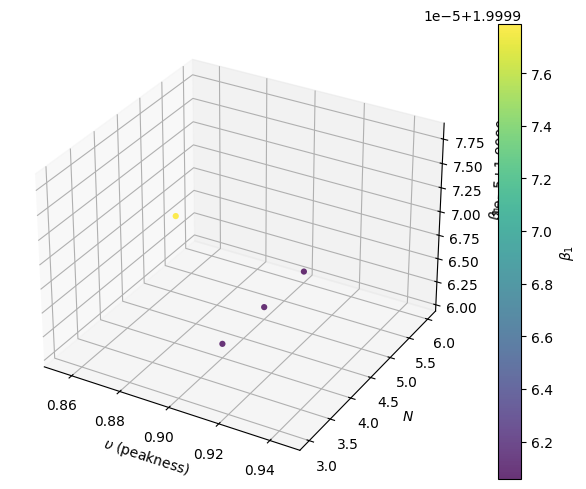

In [ ]:
P, Ngrid = np.meshgrid(peakness_vls, values_N)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    P.ravel(),
    Ngrid.ravel(),
    beta_vals_add.ravel(),
    c=beta_vals_add.ravel(),
    cmap="viridis",
    s=20,           
    alpha=0.8,     
    edgecolors='none'
)

ax.set_xlabel(r"$\upsilon$ (peakness)")
ax.set_ylabel(r"$N$")
ax.set_zlabel(r"$\beta_2$")

fig.colorbar(sc, ax=ax, label=r"$\beta_2$")

plt.tight_layout()
plt.show()

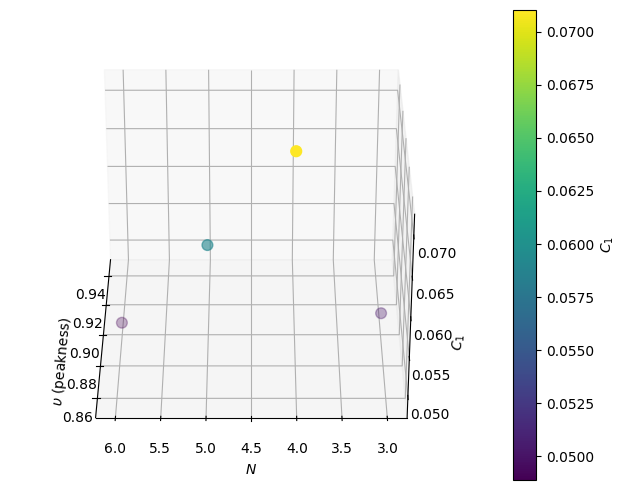

In [ ]:
P, Ngrid = np.meshgrid(peakness_vls, values_N)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    P.ravel(),
    Ngrid.ravel(),
    C_vals_add.ravel(),
    c=C_vals_add.ravel(),
    cmap="viridis",
    s=60
)

ax.set_xlabel(r"$\upsilon$ (peakness)")
ax.set_ylabel(r"$N$")
ax.set_zlabel(r"$C_2$")

ax.view_init(elev=30, azim=180)

fig.colorbar(sc, ax=ax, label=r"$C_2$")

plt.tight_layout()
plt.show()

### Fit of N dependance
The dependance of the norm of the additive Trotter error on $N$ is known from a counting argument to be linear. We use the numerical routines to fit the $N$ dependance of the Trotter error for various system and simulation parameters. 

To fit the $N$ dependance, fix $t\coloneqq\overline{t}$, $\mathcal{G}(\overline{N})\coloneqq\overline{\mathcal{G}}$ and let $\mathcal{N}=\left\{N_k=k, k=3,\dots,N_N, s=\overline{s}\right\}$ (for some fixed value $\overline{s}$). The data set for a single fit of the $N$ dependance is given by:
$$
\mathcal{D}_N^1 = \left\{\left((\overline{t},N_k,\overline{\mathcal{G}}),a_1(N_k,\overline{\mathcal{G}})\cdot \overline{t}^2\right), N_k\in \mathcal{N}\right\}
$$
This dataset is fitted to the following function:
$$
\mathcal{F}_N^1(\overline{t}, N_k,\overline{\mathcal{G}}; K_1, \gamma_1) = K_1\frac{\mu^2\overline{\Theta}^2}{2}\overline{N} t^{\gamma_1}
$$


In [ ]:
comm_terms = [[globals()[f"terms_XY{n}XZ{n}"], globals()[f"terms_XY{n}YZ{n}"], globals()[f"terms_XZ{n}YZ{n}"]] for n in values_N]

dt_list = np.arange(1, 10) / mu

gamma_vals_add = np.zeros((len(peakness_vls), len(dt_list)))
K_vals_add    = np.zeros((len(peakness_vls), len(dt_list)))

for ip, peak in enumerate(peakness_vls):
    print(f"peakness = {peak}, {time.ctime()}")
    for it, dt in enumerate(dt_list):
        print(f"dt = {dt}, {time.ctime()}")
        err_vls = []

        for n, comms in zip(values_N, comm_terms):
            couplings, angles = fp_couplings(n, peak, mu)
            err_vls.append(eval_additive_error_term_T2(comms, couplings, dt))

        def model(x, gamma, K):
            return 0.25 * K * (mu**3) * (Theta(angles)**3) * (x**(gamma-3)) * (dt**3)

        ls_obj = LeastSquares(values_N, err_vls, 0.001, model)
        m_obj = Minuit(ls_obj, gamma=1, K=1)
        m_obj.migrad()
        m_obj.hesse()

        gamma_vals_add[ip, it] = m_obj.values["gamma"]
        K_vals_add[ip, it]     = m_obj.values["K"]

peakness = 0.9, Mon Jan 26 13:36:26 2026
dt = 0.01, Mon Jan 26 13:36:26 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.02, Mon Jan 26 13:36:26 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.03, Mon Jan 26 13:36:26 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.04, Mon Jan 26 13:36:26 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.05, Mon Jan 26 13:36:26 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.06, Mon Jan 26 13:36:26 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.07, Mon Jan 26 13:36:27 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.08, Mon Jan 26 13:36:27 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.09, Mon Jan 26 13:36:27 2026
15.049868352707325
28.41085520009338
29.566

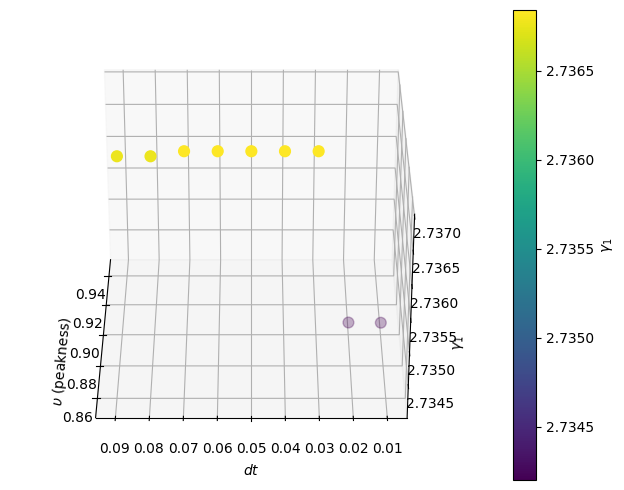

In [ ]:
P, Ngrid = np.meshgrid(peakness_vls, dt_list)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    P.ravel(),
    Ngrid.ravel(),
    gamma_vals_add.ravel(),
    c=gamma_vals_add.ravel(),
    cmap="viridis",
    s=60
)

ax.set_xlabel(r"$\upsilon$ (peakness)")
ax.set_ylabel(r"$dt$")
ax.set_zlabel(r"$\gamma_2$")

ax.view_init(elev=30, azim=180)

fig.colorbar(sc, ax=ax, label=r"$\gamma_2$")

plt.tight_layout()
plt.show()

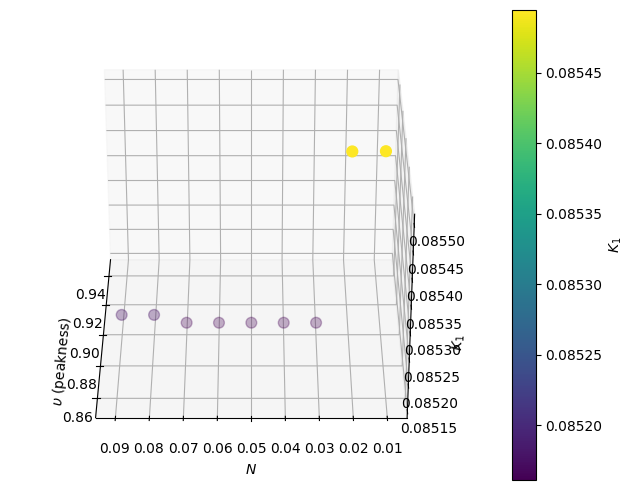

In [ ]:
P, Ngrid = np.meshgrid(peakness_vls, dt_list)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    P.ravel(),
    Ngrid.ravel(),
    K_vals_add.ravel(),
    c=K_vals_add.ravel(),
    cmap="viridis",
    s=60
)

ax.set_xlabel(r"$\upsilon$ (peakness)")
ax.set_ylabel(r"$N$")
ax.set_zlabel(r"$K_2$")

ax.view_init(elev=30, azim=180)

fig.colorbar(sc, ax=ax, label=r"$K_2$")

plt.tight_layout()
plt.show()

## Error bounds with small prefactors

Use Theorem 2 under the following set of hypothesis: 
- $H = H^N = H_{XY}^N + H_{XZ}^N + H_{YZ}^N \equiv H_1 + H_2 + H_3$ 
- $\Gamma = 3$ (implied by the Hamiltonian decomposition)

Under these assumptions, the bound for $\varepsilon_1=\varepsilon_1(dt, N, \mathcal{G}(N))$ takes the following expression:

$$
\begin{split}
\varepsilon_1
&\leq\frac{dt^2}{2}\sum_{\gamma_1=1}^3\left\| \left[ \sum_{\gamma_2=\gamma_1+1}^3H_{\gamma_2}, H_{\gamma_1} \right] \right\| \\
& = \frac{dt^2}{2}\left(\left\|\left[H_{XZ}^N,H_{XY}^N\right]+\left[H_{YZ}^N,H_{XY}^N\right]\right\|+\left\|\left[H_{XY}^N,H_{XZ}^N\right]+\left[H_{YZ}^N,H_{XZ}^N\right]\right\|+\left\|\left[H_{XY}^N,H_{YZ}^N\right]+\left[H_{XZ}^N,H_{YZ}^N\right]\right\|\right)\\
\end{split}
$$
This expression is slightly different from the additive error formula. Cancellations in the commutators may happen inside each of the three terms because two commutators contribute instead of one, as in the additive error formula.

Work it out:
$$
\begin{split}
\varepsilon_1 &\leq \frac{dt^2}{2}\left(\left\|\left[H_{XZ}^N,H_{XY}^N\right]+\left[H_{YZ}^N,H_{XY}^N\right]\right\|+\left\|\left[H_{XY}^N,H_{XZ}^N\right]+\left[H_{YZ}^N,H_{XZ}^N\right]\right\|+\left\|\left[H_{XY}^N,H_{YZ}^N\right]+\left[H_{XZ}^N,H_{YZ}^N\right]\right\|\right) \\
&= \frac{1}{8}\Biggl(\left\|\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Z_qZ_q,X_pX_q + Y_qY_q]+\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[Y_pY_q + Z_qZ_q,X_pX_q + Y_qY_q]\right\|+\\
&+                   \left\|\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Y_qY_q,X_pX_q + Z_qZ_q]+\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[Y_pY_q + Z_qZ_q,X_pX_q + Z_qZ_q]\right\|+\\
&+                   \left\|\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Y_qY_q,Y_pY_q + Z_qZ_q]+\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Z_qZ_q,Y_pY_q + Z_qZ_q]\right\|\Biggr) \\
\end{split}
$$
Recall the expression of the coupling constant for a dense neutrino gas forming in a peaked configuration and the definition of $\Theta$. We have that
$$
\begin{split}
\varepsilon_1\leq
&= \frac{1}{8}\Biggl(\left\|\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Z_qZ_q,X_pX_q + Y_qY_q]+\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[Y_pY_q + Z_qZ_q,X_pX_q + Y_qY_q]\right\|+\\
&+                   \left\|\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Y_qY_q,X_pX_q + Z_qZ_q]+\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[Y_pY_q + Z_qZ_q,X_pX_q + Z_qZ_q]\right\|+\\
&+                   \left\|\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Y_qY_q,Y_pY_q + Z_qZ_q]+\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Z_qZ_q,Y_pY_q + Z_qZ_q]\right\|\Biggr) \\
&\leq \frac{\mu^2\Theta^2}{8N^2}\Biggl(
                     \left\|\sum_{p<q}^N\sum_{m<n}^N[X_pX_q + Z_qZ_q,X_pX_q + Y_qY_q]+\sum_{p<q}^N\sum_{m<n}^N[Y_pY_q + Z_qZ_q,X_pX_q + Y_qY_q]\right\|+\\
&+                   \left\|\sum_{p<q}^N\sum_{m<n}^N[X_pX_q + Y_qY_q,X_pX_q + Z_qZ_q]+\sum_{p<q}^N\sum_{m<n}^N[Y_pY_q + Z_qZ_q,X_pX_q + Z_qZ_q]\right\|+\\
&+                   \left\|\sum_{p<q}^N\sum_{m<n}^N[X_pX_q + Y_qY_q,Y_pY_q + Z_qZ_q]+\sum_{p<q}^N\sum_{m<n}^N[X_pX_q + Z_qZ_q,Y_pY_q + Z_qZ_q]\right\|\Biggr) \\
& = \frac{\mu^2\Theta^2}{8N^2}\left\{\;\text{function of }N\;\right\} \\
\end{split}
$$
A counting argument implies that $\left\{\;\text{function of }N\;\right\}\sim N^3$, as for the additive error.

**Note**: how much are we overestimating the contribution of a generic term when the coupling is approximating with $\Theta$?


The quantity $\varepsilon_1\left(dt, N,\mathcal{G}(N)\right)$ is bounded by $\mu^2\Theta^2N^3/2N^2 = \mu^2\left(1-\upsilon\right)^2N^3/2N^2$; consequently, the first order Trotter error for small prefactors is bounded by:
$$ 
\varepsilon_1 \leq \mathcal{O}(\mu^2\Theta^2Nt^2) = \mathcal{O}(\mu^2(1-\upsilon)^2Nt^2)
$$

## Fitting error bounds with small prefactors
Define $\vec{x}_k = \left(t_k,N_k,\mathcal{G}\left(N_k\right)\right)$. Consider the following set of data points: $\mathcal{D}=\left\{\left(\vec{x}_k,e_1\left(t_kN_k,\mathcal{G}(N_k)\right)\right)\right\}$. Here, we define:
$$
\begin{split}
e_1(\vec{x}_k) &= \frac{t_k^2}{8}\Biggl(\left\|\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Z_qZ_q,X_pX_q + Y_qY_q]+\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[Y_pY_q + Z_qZ_q,X_pX_q + Y_qY_q]\right\|+\\
&+                   \left\|\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Y_qY_q,X_pX_q + Z_qZ_q]+\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[Y_pY_q + Z_qZ_q,X_pX_q + Z_qZ_q]\right\|+\\
&+                   \left\|\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Y_qY_q,Y_pY_q + Z_qZ_q]+\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Z_qZ_q,Y_pY_q + Z_qZ_q]\right\|\Biggr) \\
\end{split}
$$
This quantity is computed numerically.

The data set is constructed by letting $t_k$ and $N_k$ vary over some discrete set of values; the values of the couplings are fixed by the value $N_k$ and the peakness $\upsilon$ of the beam:
$$
\mathcal{G}(N_k) = \left\{\frac{\mu}{N_k}\left(1-\cos\left(\upsilon\frac{|i-j|}{N_k-1}\right)\right), i,j = 1,\dots,N, i<j\right\}
$$
Moreover, as anticipated, $\Theta(\upsilon) = 1-\upsilon$ is independent of $N_k$. This is a key feature of the setup because it can be exploited to analyze the $N$ dependance of the Trotter error for system with the same peakness $\upsilon$.
The dependence on $\mu$ is taken care of by noting that $t$ and $\mu$ enter in $\tilde{\alpha}_\text{comm}$ only as powers $(\mu t)^k$, hence we simply choose $t_{k} = 10^sk/\mu, k=0,\dots,N_t$, and $s\in\mathbb{Z}$ is a scale factor to be fixed in the actual simulation.

### Fit of $t$ dependance (tight)
The dependance of the Trotter error on $t$ is known from theory to be quadratic. We test the numerical routines against this benchmark by fitting the time dependance of the Trotter error for various system parameters. 

To fit the time dependance, fix $N\coloneqq\overline{N}$, $\mathcal{G}(\overline{N})\coloneqq\overline{\mathcal{G}}$ and let $T=\left\{t_k=10^sk/\mu, k=0,\dots,N_t, s=\overline{s}\right\}$ (for some fixed value $\overline{s}$). The data set for a single fit of the time dependance is given by:
$$
\mathcal{D}_t^1 = \left\{\left((t_k,\overline{N},\overline{\mathcal{G}}),e_1(t_k,\overline{N},\overline{\mathcal{G}})\right), t_k\in T\right\}
$$
This dataset is fitted to the following function:
$$
\mathcal{F}_t^1(t, \overline{N},\overline{\mathcal{G}}; K_1, \gamma_1) = K_1\frac{\mu^2\overline{\Theta}^2}{8}\overline{N} t^{\gamma_1}
$$

In [10]:
dt_list = np.arange(1, 20) / mu

beta_vals_tight = np.zeros((len(values_N), len(peakness_vls)))
C_vals_tight    = np.zeros((len(values_N), len(peakness_vls)))

terms_dict = {
    N: (
        globals()[f"terms_XY{N}XZ{N}"],
        globals()[f"terms_XY{N}YZ{N}"],
        globals()[f"terms_XZ{N}YZ{N}"],
    )
    for N in values_N
}

for iN, N in enumerate(values_N):
    terms = terms_dict[N]
    print(f"N = {N}, {time.ctime()}")

    for ip, peak in enumerate(peakness_vls):
        print(f"peakness = {peak}, {time.ctime()}")

        couplings, angles = fp_couplings(N, peak, mu)

        err_vls = []
        for dt in dt_list: err_vls.append(eval_tight_error_term_T1(terms, couplings, dt))

        def model(x, C, beta):
            return C * (mu**2) * (Theta(angles)**2) * N * (x**beta) / 8

        ls_obj = LeastSquares(dt_list, np.array(err_vls), 0.001, model)
        m_obj = Minuit(ls_obj, C=1, beta=1.5)
        m_obj.migrad()
        m_obj.hesse()

        beta_vals_tight[iN, ip] = m_obj.values["beta"]
        C_vals_tight[iN, ip]    = m_obj.values["C"]

N = 3, Mon Jan 26 13:36:27 2026
peakness = 0.9, Mon Jan 26 13:36:27 2026
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
15.049868352707325
N = 4, Mon Jan 26 13:36:27 2026
peakness = 0.9, Mon Jan 26 13:36:27 2026
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
28.41085520009338
N = 5, Mon Jan 26 13:36:27 2026
peakness = 0.9, Mon Jan 26 13:36:27 2026
29.56629361138748
29.56629361138748
29.56629361138748
29.56629361138748
29.566

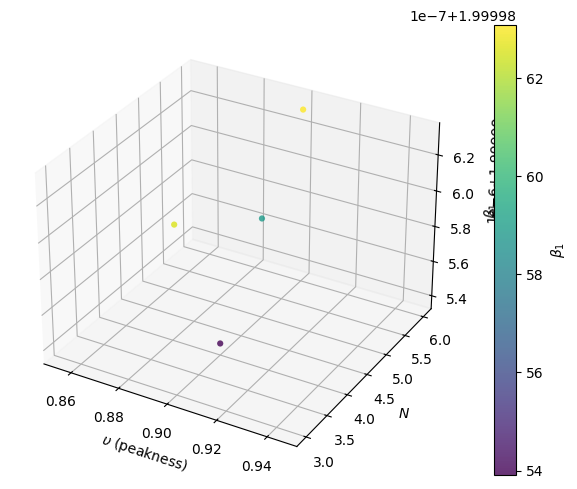

In [11]:
P, Ngrid = np.meshgrid(peakness_vls, values_N)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    P.ravel(),
    Ngrid.ravel(),
    beta_vals_tight.ravel(),
    c=beta_vals_tight.ravel(),
    cmap="viridis",
    s=20,           
    alpha=0.8,     
    edgecolors='none'
)

ax.set_xlabel(r"$\upsilon$ (peakness)")
ax.set_ylabel(r"$N$")
ax.set_zlabel(r"$\beta_1$")

fig.colorbar(sc, ax=ax, label=r"$\beta_1$")

plt.tight_layout()
plt.show()

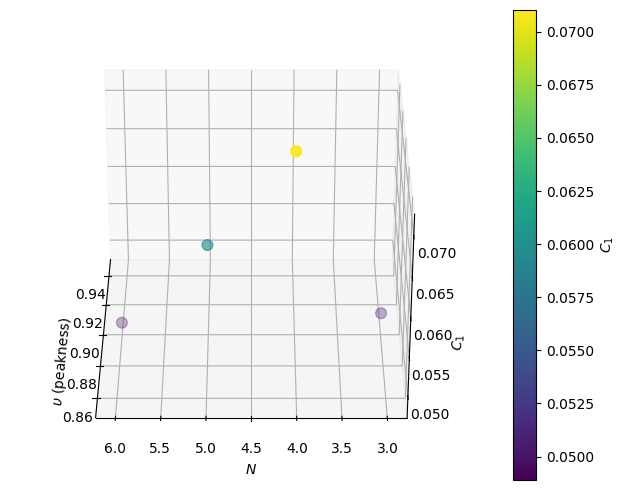

In [12]:
P, Ngrid = np.meshgrid(peakness_vls, values_N)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    P.ravel(),
    Ngrid.ravel(),
    C_vals_tight.ravel(),
    c=C_vals_tight.ravel(),
    cmap="viridis",
    s=60
)

ax.set_xlabel(r"$\upsilon$ (peakness)")
ax.set_ylabel(r"$N$")
ax.set_zlabel(r"$C_1$")

ax.view_init(elev=30, azim=180)

fig.colorbar(sc, ax=ax, label=r"$C_1$")

plt.tight_layout()
plt.show()

### Fit of N dependance (tight)
The dependance of the norm of Trotter error on $N$ is known from a counting argument to be linear. We use the numerical routines to fit the $N$ dependance of the Trotter error for various system and simulation parameters. 

To fit the $N$ dependance, fix $t\coloneqq\overline{t}$, $\mathcal{G}(\overline{N})\coloneqq\overline{\mathcal{G}}$ and let $\mathcal{N}=\left\{N_k=k, k=3,\dots,N_N, s=\overline{s}\right\}$ (for some fixed value $\overline{s}$). The data set for a single fit of the $N$ dependance is given by:
$$
\mathcal{D}_N^1 = \left\{\left((\overline{t},N_k,\overline{\mathcal{G}}),e_1(\overline{t}, N_k,\overline{\mathcal{G}})\right), N_k\in \mathcal{N}\right\}
$$
This dataset is fitted to the following function:
$$
\mathcal{F}_N^1(\overline{t}, N_k,\overline{\mathcal{G}}; K_1, \gamma_1) = K_1\frac{\mu^2\overline{\Theta}^2}{8}t^2 N^\gamma_1
$$


In [13]:
comm_terms = [[globals()[f"terms_XY{n}XZ{n}"], globals()[f"terms_XY{n}YZ{n}"], globals()[f"terms_XZ{n}YZ{n}"]] for n in values_N]

dt_list = np.arange(1, 10) / mu

gamma_vals_tight = np.zeros((len(peakness_vls), len(dt_list)))
K_vals_tight    = np.zeros((len(peakness_vls), len(dt_list)))

for ip, peak in enumerate(peakness_vls):
    print(f"peakness = {peak}, {time.ctime()}")
    for it, dt in enumerate(dt_list):
        print(f"dt = {dt}, {time.ctime()}")
        err_vls = []

        for n, comms in zip(values_N, comm_terms):
            couplings, angles = fp_couplings(n, peak, mu)
            err_vls.append(eval_tight_error_term_T1(comms, couplings, dt))

        def model(x, gamma, K):
            return 0.5 * K * (mu**2) * (Theta(angles)**2) * (x**(gamma-2)) * (dt**2)

        ls_obj = LeastSquares(values_N, err_vls, 0.001, model)
        m_obj = Minuit(ls_obj, gamma=1, K=1)
        m_obj.migrad()
        m_obj.hesse()

        gamma_vals_tight[ip, it] = m_obj.values["gamma"]
        K_vals_tight[ip, it]    = m_obj.values["K"]

peakness = 0.9, Mon Jan 26 13:36:30 2026
dt = 0.01, Mon Jan 26 13:36:30 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.02, Mon Jan 26 13:36:30 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.03, Mon Jan 26 13:36:30 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.04, Mon Jan 26 13:36:30 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.05, Mon Jan 26 13:36:30 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.06, Mon Jan 26 13:36:30 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.07, Mon Jan 26 13:36:30 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.08, Mon Jan 26 13:36:30 2026
15.049868352707325
28.41085520009338
29.56629361138748
29.337805799543098
dt = 0.09, Mon Jan 26 13:36:30 2026
15.049868352707325
28.41085520009338
29.566

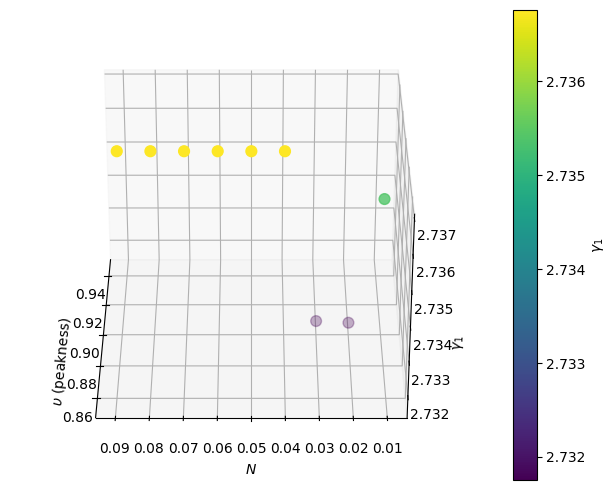

In [14]:
P, Ngrid = np.meshgrid(peakness_vls, dt_list)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    P.ravel(),
    Ngrid.ravel(),
    gamma_vals_tight.ravel(),
    c=gamma_vals_tight.ravel(),
    cmap="viridis",
    s=60
)

ax.set_xlabel(r"$\upsilon$ (peakness)")
ax.set_ylabel(r"$N$")
ax.set_zlabel(r"$\gamma_1$")

ax.view_init(elev=30, azim=180)

fig.colorbar(sc, ax=ax, label=r"$\gamma_1$")

plt.tight_layout()
plt.show()

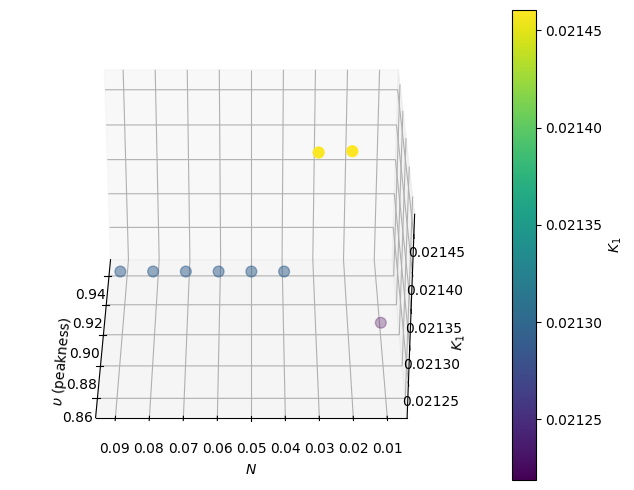

In [15]:
P, Ngrid = np.meshgrid(peakness_vls, dt_list)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    P.ravel(),
    Ngrid.ravel(),
    K_vals_tight.ravel(),
    c=K_vals_tight.ravel(),
    cmap="viridis",
    s=60
)

ax.set_xlabel(r"$\upsilon$ (peakness)")
ax.set_ylabel(r"$N$")
ax.set_zlabel(r"$K_1$")

ax.view_init(elev=30, azim=180)

fig.colorbar(sc, ax=ax, label=r"$K_1$")

plt.tight_layout()
plt.show()